## 1. Импортирование библиотек, загрузка данных, определение признаков, заполнение пропусков, вывод информации о пропусках:

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.impute import SimpleImputer, KNNImputer

# Считываем данные
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Посмотрим на первые несколько строк данных
print(train_data.head())
print(test_data.head())

# Проверим наличие пропусков
print(train_data.isnull().sum())
print(test_data.isnull().sum())

# Определение числовых и категориальных признаков
dtypes = train_data.dtypes
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = [col for col in train_data.columns if train_data[col].dtype == 'object']

# Проверим, какие столбцы присутствуют в обоих наборах данных
common_num_cols = [col for col in num_cols if col in test_data.columns]
common_cat_cols = [col for col in cat_cols if col in test_data.columns]

# Заполнение пропусков в категориальных признаках модой
for col in common_cat_cols:
    train_data[col] = train_data[col].fillna(train_data[col].mode()[0])
    test_data[col] = test_data[col].fillna(test_data[col].mode()[0])

# Заполнение пропусков в числовых признаках с помощью KNNImputer
imputer = KNNImputer(n_neighbors=10)

for num_col in common_num_cols:
    train_data[[num_col]] = imputer.fit_transform(train_data[[num_col]])
    test_data[[num_col]] = imputer.transform(test_data[[num_col]])

# Проверим, что пропуски заполнены
print(train_data.isnull().sum())
print(test_data.isnull().sum())


  ApplicationDate   Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration  \
0      2010-06-26  27.0       66829.0        549.0     17290.0          60.0   
1      1996-09-23  55.0      172147.0        850.0     16110.0          36.0   
2      2015-01-19  51.0      300000.0        850.0     38436.0          36.0   
3      1981-05-12  25.0       34683.0        847.0     19186.0          48.0   
4      1995-05-07  55.0      300000.0        850.0     30437.0          48.0   

  MaritalStatus  NumberOfDependents HomeOwnershipStatus  MonthlyDebtPayments  \
0      Divorced                 1.0                Rent               1095.0   
1       Widowed                 1.0            Mortgage                211.0   
2       Married                 0.0            Mortgage                546.0   
3       Married                 0.0               Other                153.0   
4        Single                 2.0                Rent                562.0   

   ...  EmploymentStatus  EducationLev

## 2. Уберем из таблицы дубликаты

In [9]:
# Удаление дубликатов
train_data = train_data.drop_duplicates()

# Удаление выбросов в столбце RiskScore
filter_risk_score = (train_data['RiskScore'] > 0) & (train_data['RiskScore'] < 100)
train_data = train_data.loc[filter_risk_score]

# Покажем максимальное, минимальное и среднее значение для каждого из числовых признаков
for num_col in common_num_cols:
    print(f"\nДля признака {num_col}:")
    print(f"Максимум: {train_data[num_col].max()}")
    print(f"Минимум: {train_data[num_col].min()}")
    print(f"Среднее: {train_data[num_col].mean()}")
    print(f"Стандартное отклонение: {train_data[num_col].std()}")


Для признака Age:
Максимум: 80.0
Минимум: 18.0
Среднее: 39.85349407437679
Стандартное отклонение: 11.585621175144777

Для признака AnnualIncome:
Максимум: 748508.0
Минимум: 15000.0
Среднее: 131612.62065794852
Стандартное отклонение: 115782.16876354016

Для признака CreditScore:
Максимум: 850.0
Минимум: 300.0
Среднее: 678.0698527182027
Стандартное отклонение: 171.0839278449198

Для признака LoanAmount:
Максимум: 418997.0
Минимум: 1063.0
Среднее: 29809.694375497165
Стандартное отклонение: 26670.637068387587

Для признака LoanDuration:
Максимум: 120.0
Минимум: 12.0
Среднее: 53.36616264814058
Стандартное отклонение: 24.463800581372475

Для признака NumberOfDependents:
Максимум: 6.0
Минимум: 0.0
Среднее: 1.5655905190028607
Стандартное отклонение: 1.4190781019110996

Для признака MonthlyDebtPayments:
Максимум: 10879.0
Минимум: 13.0
Среднее: 546.9099040454756
Стандартное отклонение: 491.54952907181985

Для признака CreditCardUtilizationRate:
Максимум: 0.914634661349494
Минимум: 0.00367355770

## 3. Оценим корреляцию целевого признака с другими признаками, избавимся от целевого признака

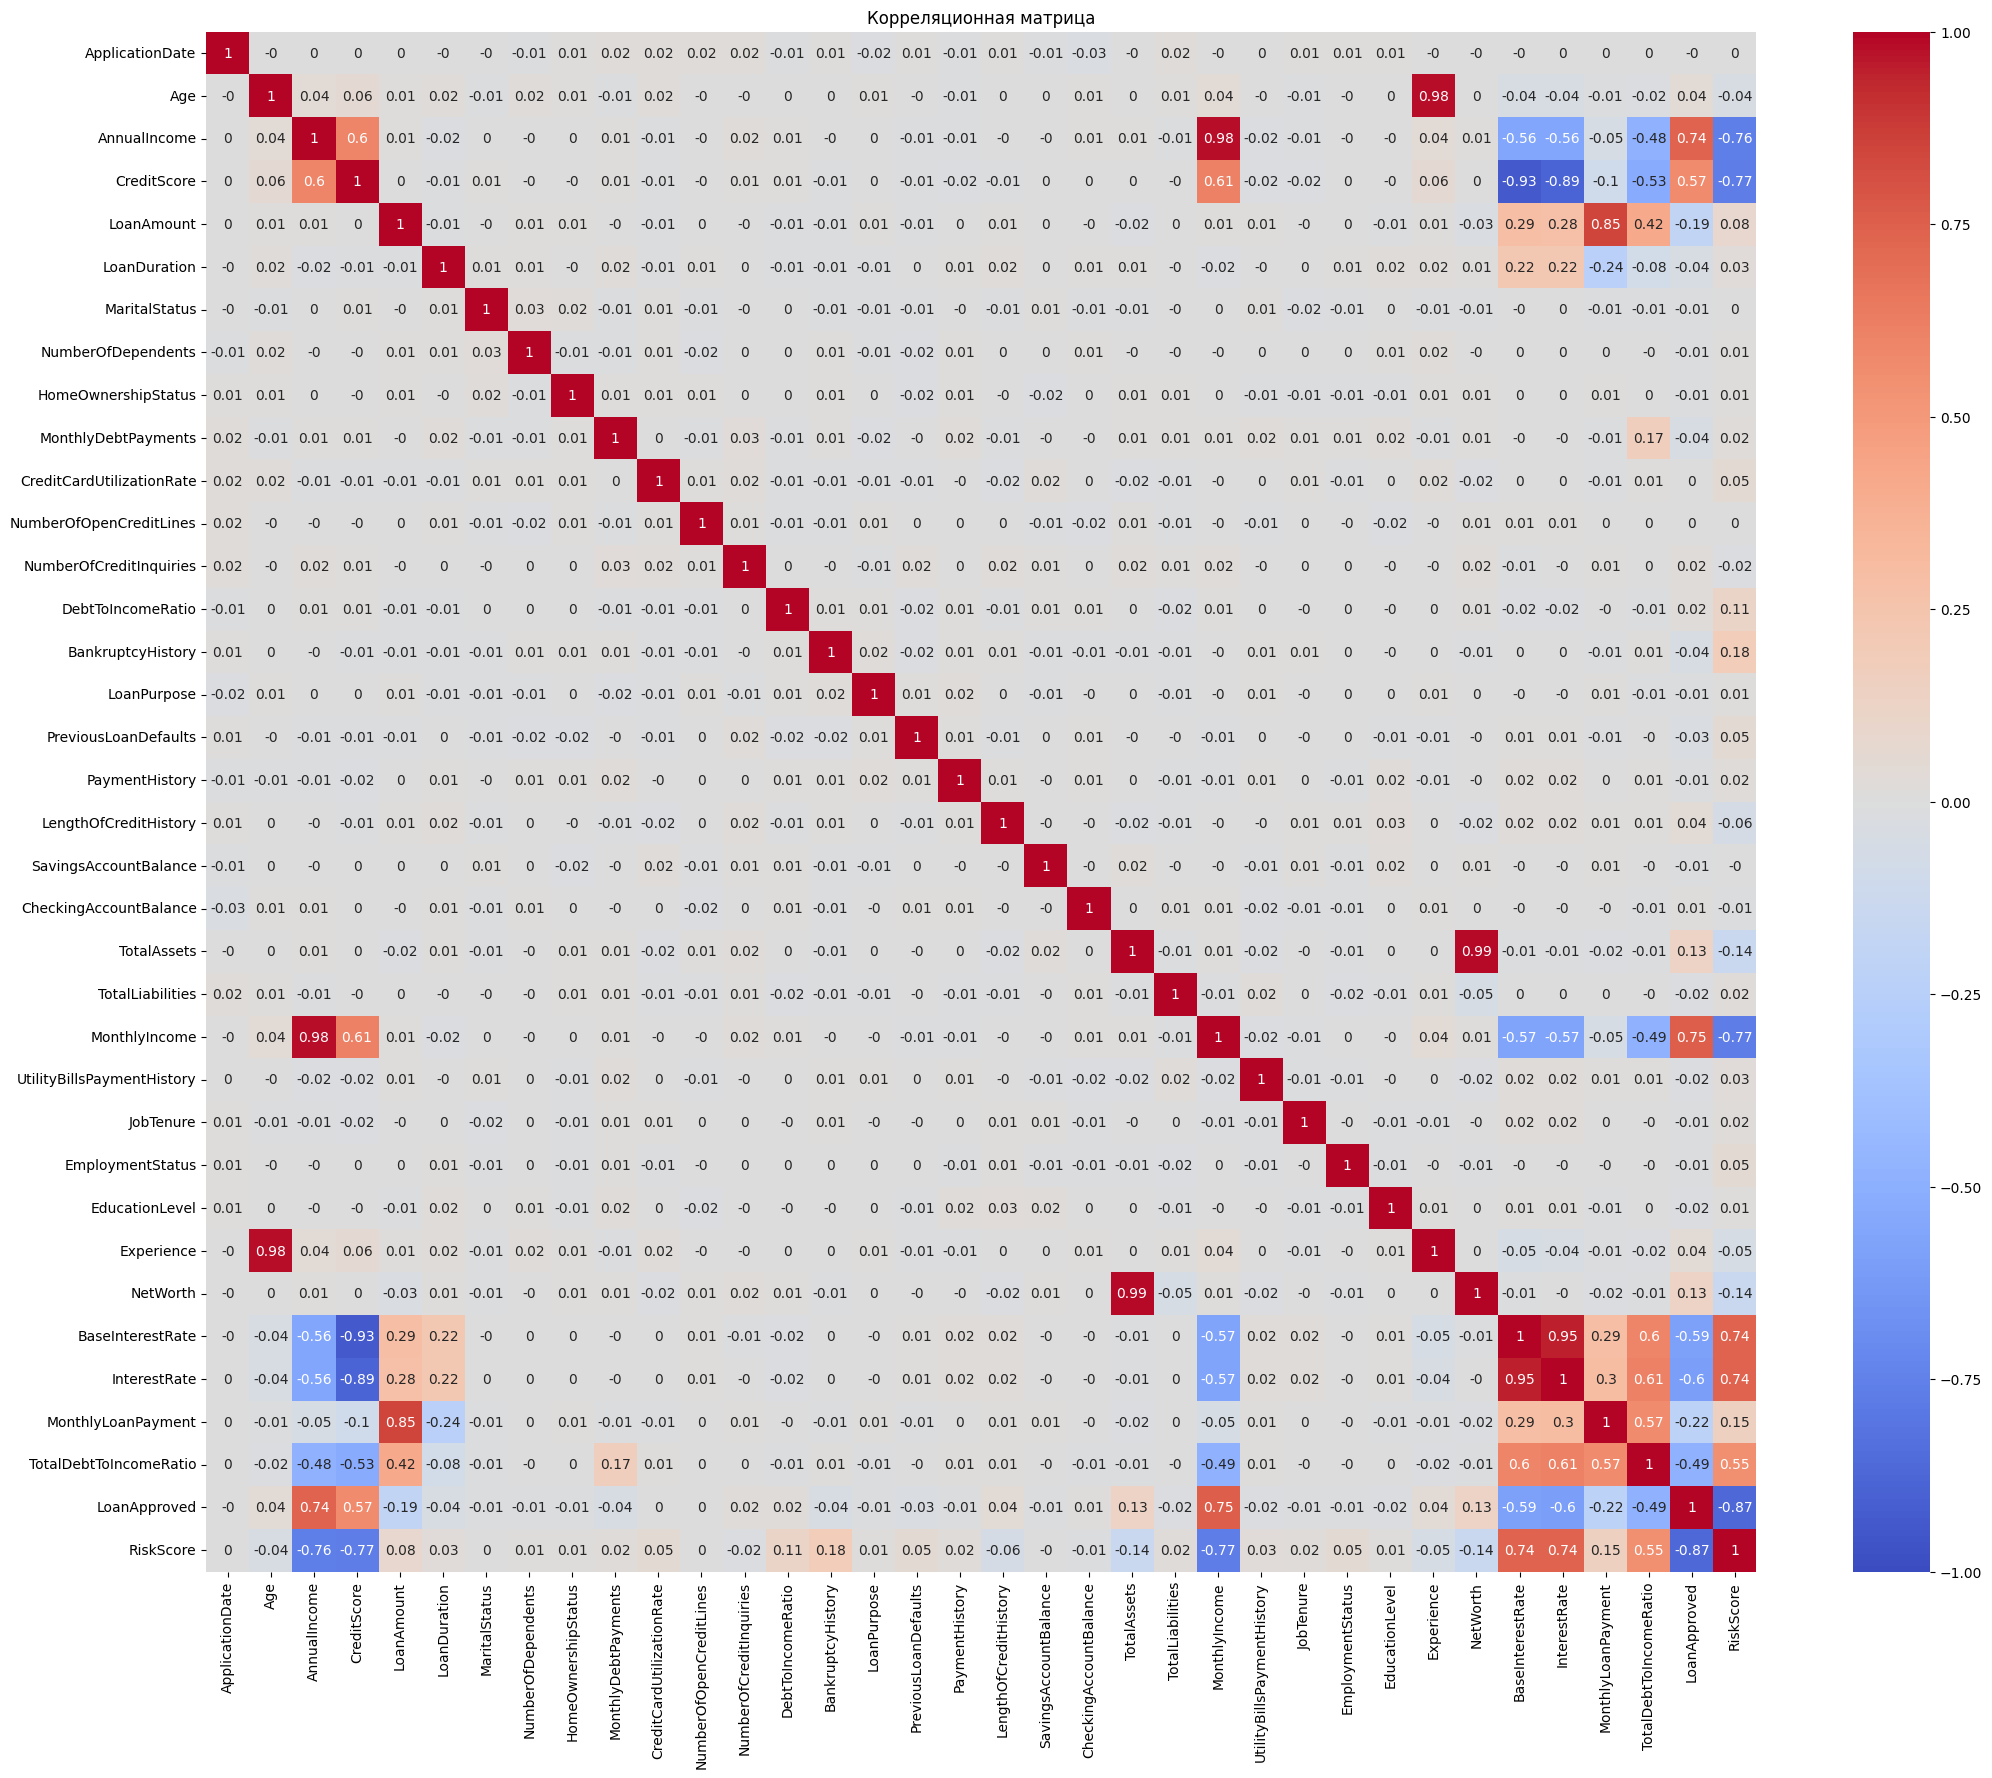

Корреляция целевого признака со всеми остальными:
LoanApproved                  1.000000
MonthlyIncome                 0.754304
AnnualIncome                  0.741913
CreditScore                   0.567070
NetWorth                      0.125816
TotalAssets                   0.125554
Age                           0.038395
Experience                    0.038366
LengthOfCreditHistory         0.036372
DebtToIncomeRatio             0.015969
NumberOfCreditInquiries       0.015702
CheckingAccountBalance        0.013210
CreditCardUtilizationRate     0.003842
NumberOfOpenCreditLines       0.002831
ApplicationDate              -0.001704
EmploymentStatus             -0.005307
JobTenure                    -0.006587
PaymentHistory               -0.007255
SavingsAccountBalance        -0.007837
MaritalStatus                -0.008488
HomeOwnershipStatus          -0.009557
NumberOfDependents           -0.010534
LoanPurpose                  -0.010664
EducationLevel               -0.015191
TotalLiabiliti

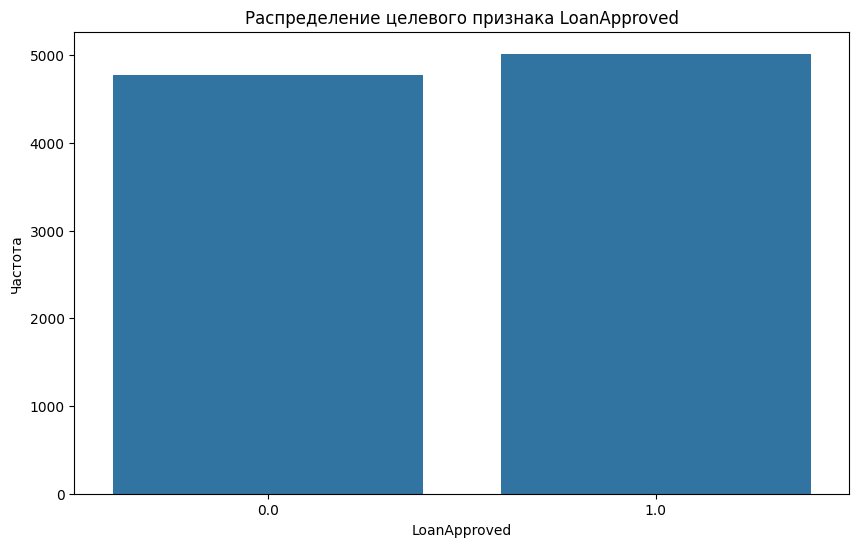

Признаки с высокой мультиколлинеарностью (корреляция > 0.8):
[('Age', 'Experience'), ('AnnualIncome', 'MonthlyIncome'), ('CreditScore', 'BaseInterestRate'), ('CreditScore', 'InterestRate'), ('LoanAmount', 'MonthlyLoanPayment'), ('TotalAssets', 'NetWorth'), ('BaseInterestRate', 'InterestRate'), ('LoanApproved', 'RiskScore')]
Наиболее коррелирующие признаки с целевым признаком:
MonthlyIncome              0.754304
AnnualIncome               0.741913
CreditScore                0.567070
NetWorth                   0.125816
TotalAssets                0.125554
Age                        0.038395
Experience                 0.038366
LengthOfCreditHistory      0.036372
DebtToIncomeRatio          0.015969
NumberOfCreditInquiries    0.015702
Name: LoanApproved, dtype: float64


In [11]:
# Выделим числовые и категориальные признаки
num_cols = train_data.select_dtypes(include=['float64', 'int64'])
target_col = train_data.columns[-2]
categorical_cols = [col for col in train_data.columns if train_data[col].dtype == 'object']

# Преобразуем категориальные признаки в числовые для успешной корреляции
le = LabelEncoder()
for col in categorical_cols:
    train_data[col] = le.fit_transform(train_data[col])

# Создадим копию исходных данных для корреляционной матрицы
matrix = train_data.copy()
cor_matrix = matrix.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(25, 20))
sns.heatmap(cor_matrix.round(2), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляционная матрица')
plt.show()

# Корреляция целевого признака со всеми остальными
target_corr = cor_matrix[target_col].sort_values(ascending=False)

# Вывод корреляции целевого признака со всеми остальными
print("Корреляция целевого признака со всеми остальными:")
print(target_corr)

# Визуализация распределения целевого признака
plt.figure(figsize=(10, 6))
sns.countplot(x=target_col, data=train_data)
plt.title(f'Распределение целевого признака {target_col}')
plt.xlabel(target_col)
plt.ylabel('Частота')
plt.show()

# Анализ мультиколлинеарности между признаками
high_corr_vars = np.where(cor_matrix.abs() > 0.8)
high_corr_vars = [(cor_matrix.columns[x], cor_matrix.columns[y]) for x, y in zip(*high_corr_vars) if x != y and x < y]

print("Признаки с высокой мультиколлинеарностью (корреляция > 0.8):")
print(high_corr_vars)

# Вывод наиболее коррелирующих признаков с целевым
top_corr_features = target_corr.drop(target_col).head(10)
print("Наиболее коррелирующие признаки с целевым признаком:")
print(top_corr_features)


## 4. Выберем признаки с корреляцией по модулю больше 0.01, чтобы получить лучшие предсказания, визуализируем мультиколлинеарные пары признаков, удалим признаки с низкой корреляцией с целевым признаком и один из признаков из мультиколлинеарных пар.


Мультикорреляционные признаки (корреляция по модулю >= 0.8):


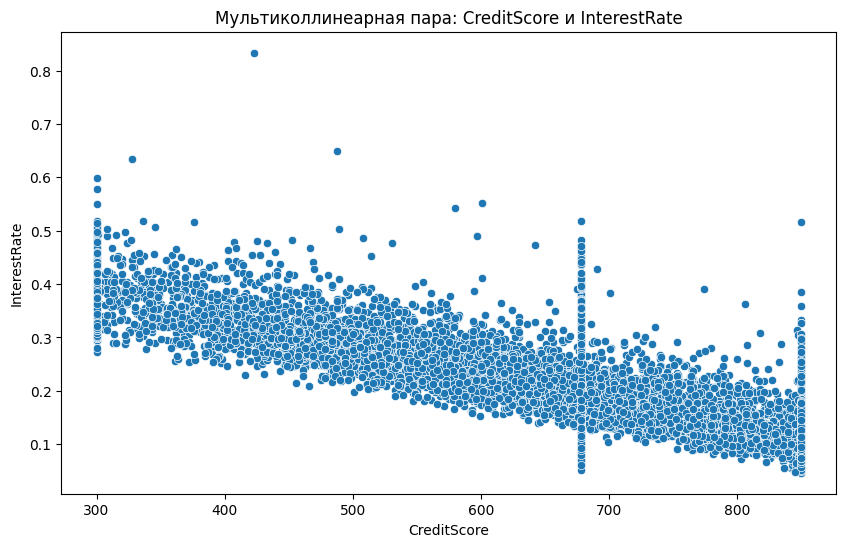

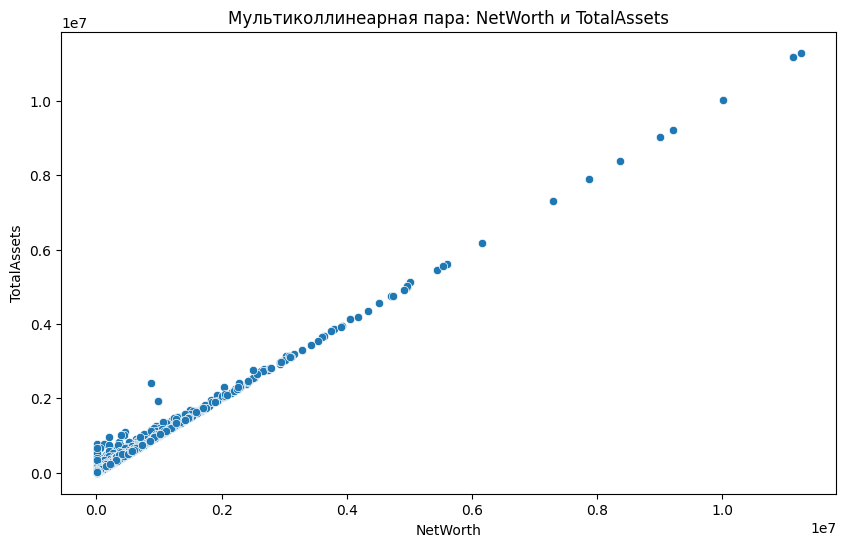

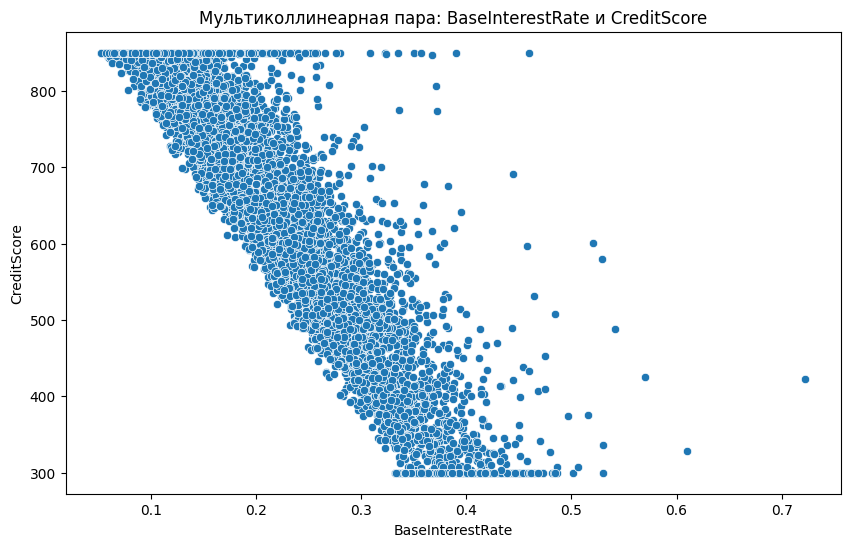

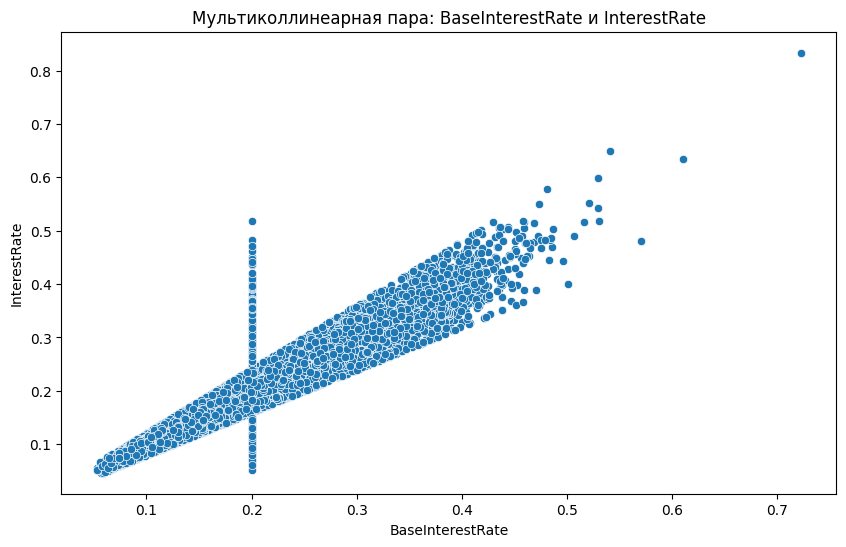

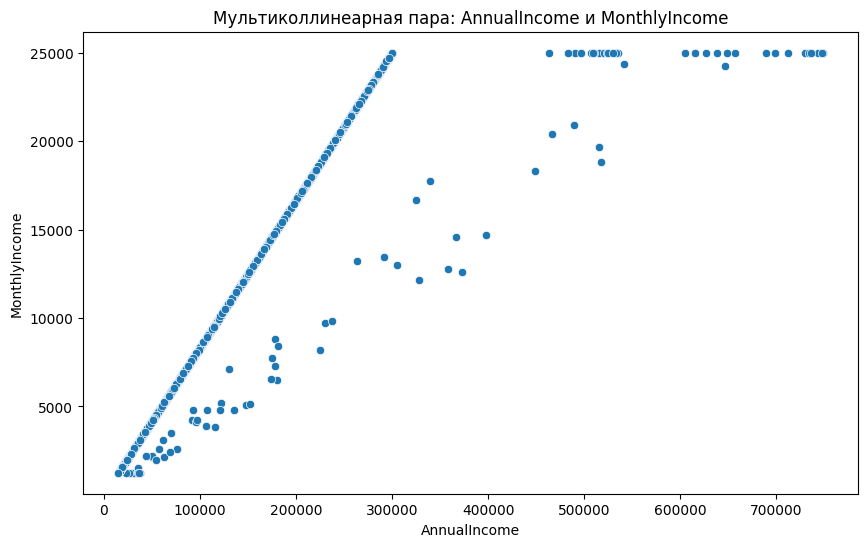

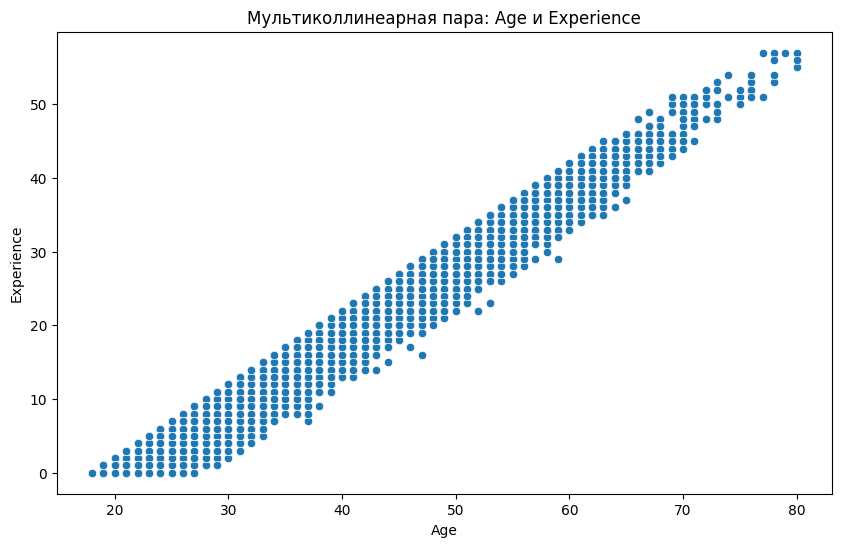

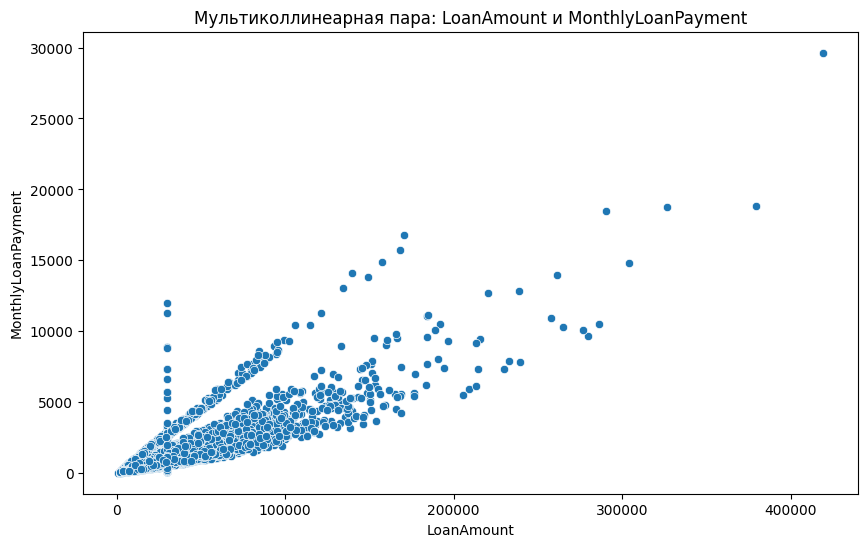

Пара: CreditScore, InterestRate
Пара: NetWorth, TotalAssets
Пара: BaseInterestRate, CreditScore
Пара: BaseInterestRate, InterestRate
Пара: AnnualIncome, MonthlyIncome
Пара: Age, Experience
Пара: LoanAmount, MonthlyLoanPayment

Исключим следующие элементы:
['InterestRate', 'TotalAssets', 'CreditScore', 'InterestRate', 'MonthlyIncome', 'Experience', 'MonthlyLoanPayment', 'RiskScore']

Окончательный список отобранных признаков:
['AnnualIncome', 'NetWorth', 'Age', 'LengthOfCreditHistory', 'DebtToIncomeRatio', 'NumberOfCreditInquiries', 'CheckingAccountBalance', 'NumberOfDependents', 'LoanPurpose', 'EducationLevel', 'TotalLiabilities', 'UtilityBillsPaymentHistory', 'PreviousLoanDefaults', 'BankruptcyHistory', 'MonthlyDebtPayments', 'LoanDuration', 'LoanAmount', 'TotalDebtToIncomeRatio', 'BaseInterestRate']


In [12]:
# Выбираем признаки с корреляцией по модулю больше 0.01, чтобы получить лучшие предсказания
selected_features = target_corr[abs(target_corr) > 0.01].index.tolist()
selected_features.remove(target_col)  # Удалим целевой признак

# Найдем мультиколлинеарные пары признаков
multi_corr = cor_matrix.unstack().loc[lambda x: (abs(x) >= 0.8) & (x != 1.0)]
print("\nМультикорреляционные признаки (корреляция по модулю >= 0.8):")

unique_pairs = set()
for (feature1, feature2), corr_value in multi_corr.items():
    if feature1 in selected_features and feature2 in selected_features:
        unique_pairs.add(tuple(sorted([feature1, feature2])))

# Визуализация мультиколлинеарных пар признаков
for pair in unique_pairs:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=pair[0], y=pair[1], data=train_data)
    plt.title(f'Мультиколлинеарная пара: {pair[0]} и {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()

# Выводим мультиколлинеарные пары
for pair in unique_pairs:
    print(f"Пара: {pair[0]}, {pair[1]}")

# Формируем список на удаление одного из элементов пары
to_remove = []
for feature1, feature2 in unique_pairs:
    if feature2 in selected_features:
        to_remove.append(feature2)

# Добавим признак 'RiskScore' в список на удаление
to_remove.append('RiskScore')

print("\nИсключим следующие элементы:")  # исключим по одному элементу из каждой пары мультиколлинеарных
print(to_remove)

# Удаляем признаки по маске
selected_features = [feature for feature in selected_features if feature not in to_remove]

print("\nОкончательный список отобранных признаков:")
print(selected_features)


## 5. Опишем линейный классификатор и методы для него

In [18]:
class CustomClassifier:
    def __init__(self, model_type='linear', learning_rate=0.01, max_iter=1000, lambda_reg=0.01):
        self.model_type = model_type
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.lambda_reg = lambda_reg  # Параметр регуляризации
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Градиентный спуск
        for _ in range(self.max_iter):
            linear_model = np.dot(X, self.weights) + self.bias

            if self.model_type == 'linear':
                y_pred = self._step_function(linear_model)  # Линейный классификатор
            elif self.model_type == 'logistic':
                y_pred = self._sigmoid(linear_model)  # Логистическая регрессия
            else:
                raise ValueError("Неизвестный тип модели. Используйте 'linear' или 'logistic'.")

            # Вычисление градиентов
            gradient_weights = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + (self.lambda_reg / n_samples) * self.weights
            gradient_bias = (1 / n_samples) * np.sum(y_pred - y)

            # Обновление весов и смещения
            self.weights -= self.learning_rate * gradient_weights
            self.bias -= self.learning_rate * gradient_bias

            # Вычисление ошибки (loss)
            loss = self._compute_loss(y, y_pred)
            print(f'Итерация {_ + 1}/{self.max_iter}, Ошибка: {loss}')

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias

        if self.model_type == 'linear':
            return self._step_function(linear_model)  # Линейный классификатор
        elif self.model_type == 'logistic':
            probabilities = self._sigmoid(linear_model)
            return np.where(probabilities > 0.5, 1, 0)  # Логистическая регрессия

    def _step_function(self, x):
        # Функция Хевисайда (ступенчатая функция)
        return np.where(x >= 0, 1, 0)

    def _sigmoid(self, x):
        # Сигмоидная функция
        x = np.clip(x, -709, 709)
        return 1 / (1 + np.exp(-x))

    def _compute_loss(self, y_true, y_pred):
        # Вычисление ошибки (loss)
        epsilon = 1e-7  # Малое значение для предотвращения деления на ноль
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

        if self.model_type == 'linear':
            return np.mean((y_true - y_pred) ** 2)  # Среднеквадратичная ошибка
        elif self.model_type == 'logistic':
            return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))  # Логарифмическая ошибка

    def evaluate(self, X, y_true):
        y_pred = self.predict(X)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        accuracy = accuracy_score(y_true, y_pred)

        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'F1 Score: {f1}')
        print(f'Accuracy: {accuracy}')

        return precision, recall, f1, accuracy


## 6. Обучим модели и сделаем предсказания на тестовой выборке

Итерация 1/1000, Ошибка: 0.4873313287699324
Итерация 2/1000, Ошибка: 0.5126684712300877
Итерация 3/1000, Ошибка: 0.48508367903556376
Итерация 4/1000, Ошибка: 0.35952179160197156
Итерация 5/1000, Ошибка: 0.22353898267267047
Итерация 6/1000, Ошибка: 0.38731091559052905
Итерация 7/1000, Ошибка: 0.21761336064569864
Итерация 8/1000, Ошибка: 0.20484262351860424
Итерация 9/1000, Ошибка: 0.4262361223539128
Итерация 10/1000, Ошибка: 0.23774004235799942
Итерация 11/1000, Ошибка: 0.20136898302003456
Итерация 12/1000, Ошибка: 0.4121372285656006
Итерация 13/1000, Ошибка: 0.2462198118103901
Итерация 14/1000, Ошибка: 0.19084589562730878
Итерация 15/1000, Ошибка: 0.3926235422354003
Итерация 16/1000, Ошибка: 0.23978336029833452
Итерация 17/1000, Ошибка: 0.1805271400286165
Итерация 18/1000, Ошибка: 0.37566400333061895
Итерация 19/1000, Ошибка: 0.2310992590519103
Итерация 20/1000, Ошибка: 0.17715566542706357
Итерация 21/1000, Ошибка: 0.36309759799755803
Итерация 22/1000, Ошибка: 0.22435630984880447
Итера

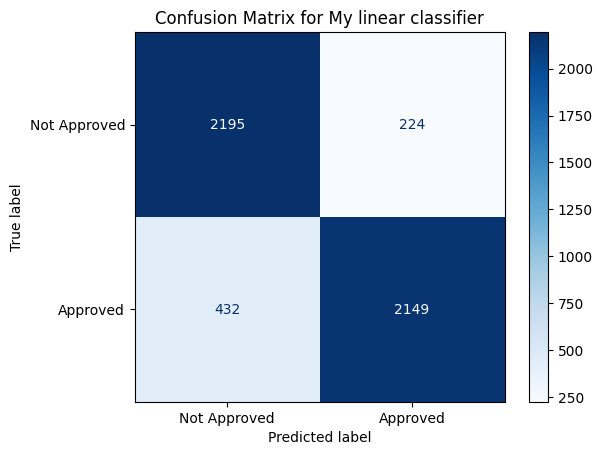

Итерация 1/1000, Ошибка: 0.6931471805599453
Итерация 2/1000, Ошибка: 7.818626752886061
Итерация 3/1000, Ошибка: 3.8187438252735673
Итерация 4/1000, Ошибка: 6.960685622691479
Итерация 5/1000, Ошибка: 4.963214238945336
Итерация 6/1000, Ошибка: 3.9636551869705006
Итерация 7/1000, Ошибка: 7.541977789599495
Итерация 8/1000, Ошибка: 4.712912795970922
Итерация 9/1000, Ошибка: 3.214397578098173
Итерация 10/1000, Ошибка: 6.934338102380672
Итерация 11/1000, Ошибка: 4.28805903090958
Итерация 12/1000, Ошибка: 3.029964935912794
Итерация 13/1000, Ошибка: 6.560532657939824
Итерация 14/1000, Ошибка: 4.0855124685008315
Итерация 15/1000, Ошибка: 2.8669396539820586
Итерация 16/1000, Ошибка: 6.249302574242324
Итерация 17/1000, Ошибка: 3.8813191860744563
Итерация 18/1000, Ошибка: 2.8405921336702846
Итерация 19/1000, Ошибка: 6.043462571796816
Итерация 20/1000, Ошибка: 3.7199406241594124
Итерация 21/1000, Ошибка: 2.827418373513456
Итерация 22/1000, Ошибка: 5.827742249233982
Итерация 23/1000, Ошибка: 3.616197

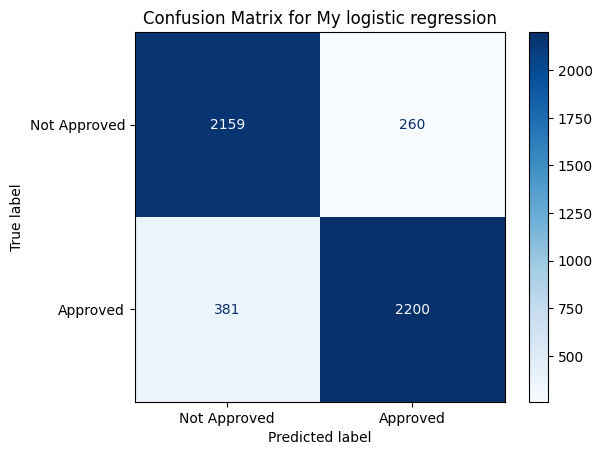

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


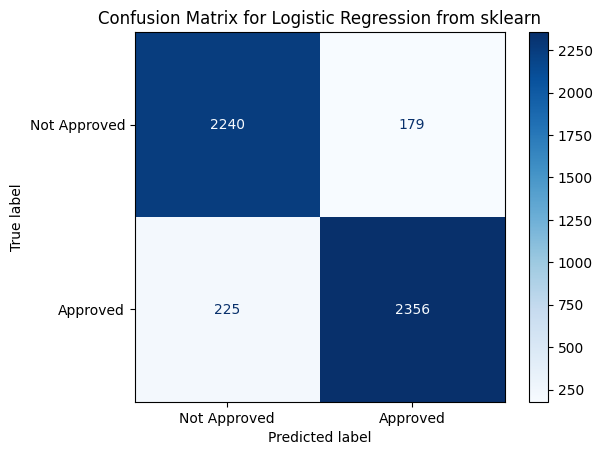

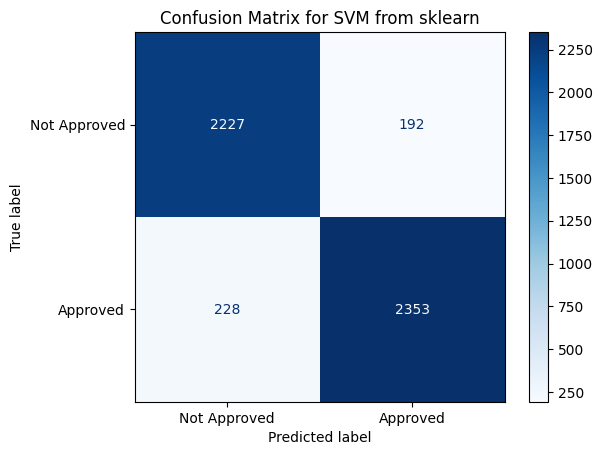

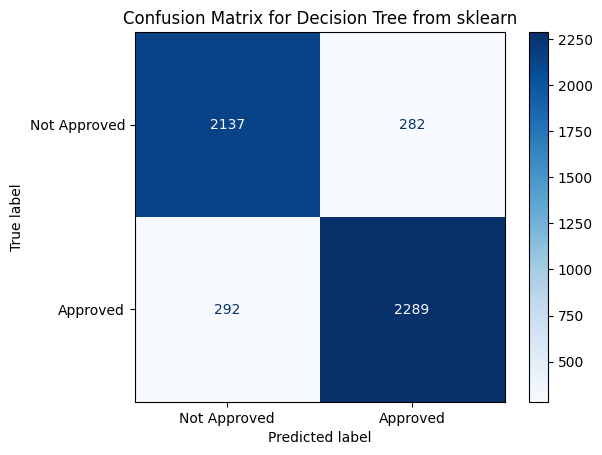

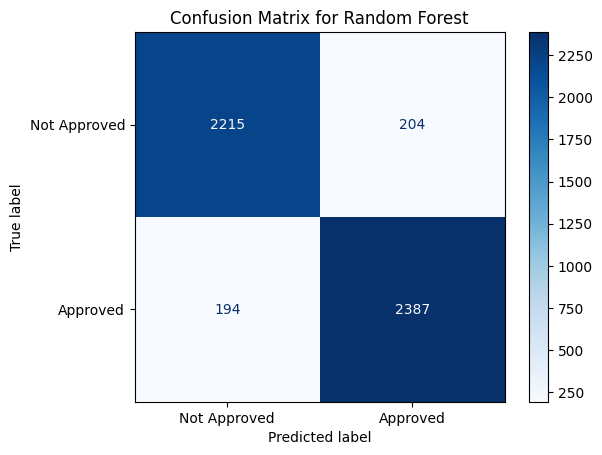

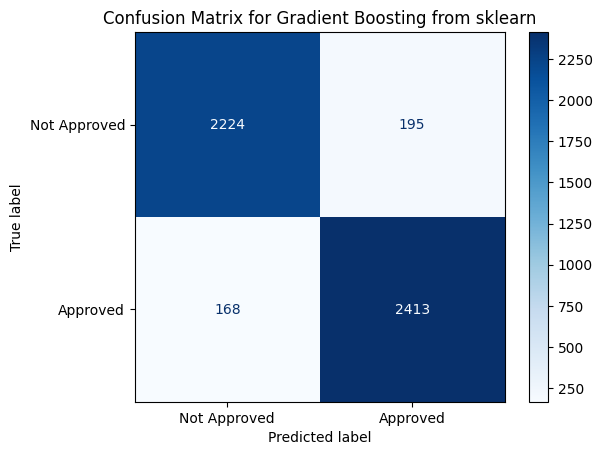

[LightGBM] [Info] Number of positive: 5018, number of negative: 4770
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000872 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2682
[LightGBM] [Info] Number of data points in the train set: 9788, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.512669 -> initscore=0.050685
[LightGBM] [Info] Start training from score 0.050685


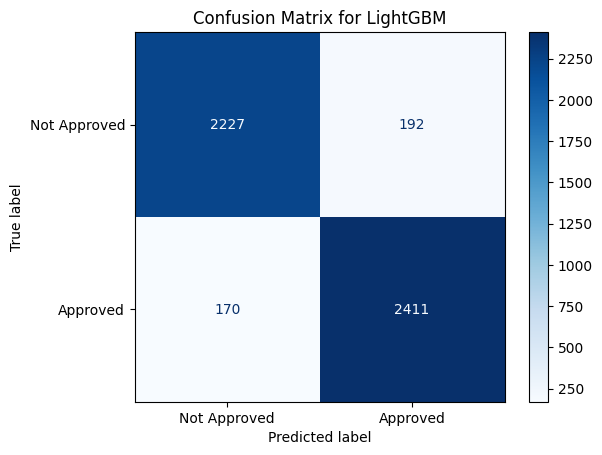

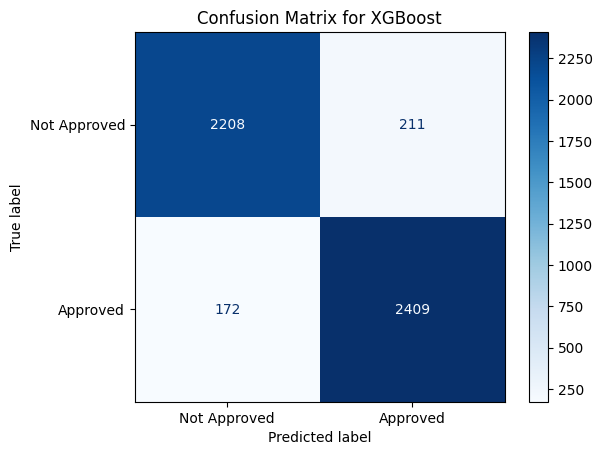

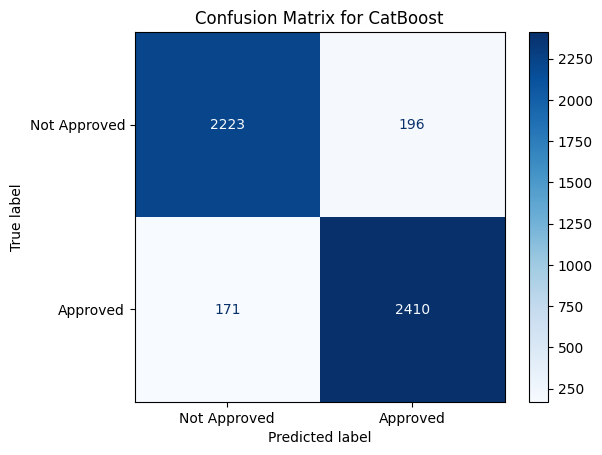

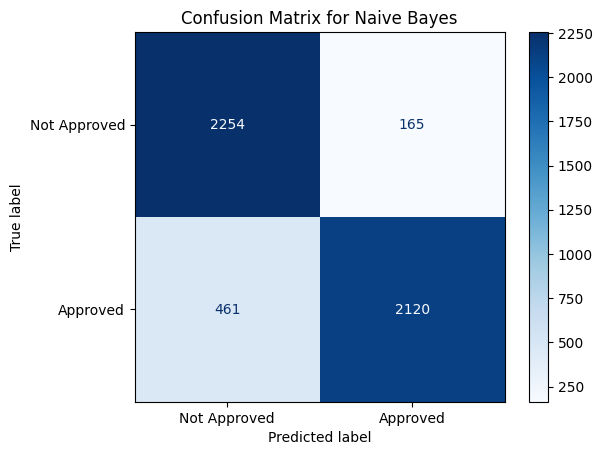

                               Model  Precision    Recall  F1 Score  Accuracy
0               My linear classifier   0.905605  0.832623  0.867582    0.8688
1             My logistic regression   0.894309  0.852383  0.872843    0.8718
2   Logistic Regression from sklearn   0.929389  0.912824  0.921032    0.9192
3                   SVM from sklearn   0.924558  0.911662  0.918065    0.9160
4         Decision Tree from sklearn   0.890315  0.886866  0.888587    0.8852
5                      Random Forest   0.921266  0.924835  0.923047    0.9204
6     Gradient Boosting from sklearn   0.925230  0.934909  0.930044    0.9274
7                           LightGBM   0.926239  0.934134  0.930170    0.9276
8                            XGBoost   0.919466  0.933359  0.926360    0.9234
9                           CatBoost   0.924789  0.933747  0.929246    0.9266
10                       Naive Bayes   0.927790  0.821387  0.871352    0.8748


In [19]:
from sklearn.linear_model import LogisticRegression as SklearnLogReg
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

# Загрузка тестовых данных
test = pd.read_csv('test.csv')

# Готовим данные для предсказаний, кодируем категориальные признаки и избираем только нужные числовые
categorical_cols = [col for col in test.columns if test[col].dtype == 'object']

le = LabelEncoder()
for col in categorical_cols:
    test[col] = le.fit_transform(test[col])

X_train = train_data[selected_features]
Y_train = train_data[target_col]

X_test = test[selected_features]
y_test = test['LoanApproved']

# Определение моделей
models = {
    'My linear classifier': CustomClassifier(model_type='linear', learning_rate=0.01, max_iter=1000),
    'My logistic regression': CustomClassifier(model_type='logistic', learning_rate=0.01, max_iter=1000),
    'Logistic Regression from sklearn': SklearnLogReg(),
    'SVM from sklearn': SVC(),
    'Decision Tree from sklearn': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting from sklearn': GradientBoostingClassifier(),
    'LightGBM': LGBMClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'Naive Bayes': GaussianNB()
}

# Обучение моделей и оценка их производительности
results = {}
metrics = []

for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    results[name] = y_pred

    # Вычисление метрик
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Добавление метрик в таблицу
    metrics.append({
        'Model': name,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Accuracy': accuracy
    })

    # Визуализация confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Approved', 'Approved'])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

# Таблица сравнения метрик
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


## 7. Вывод

В этой лабораторной работе я сравнил свои собственные реализации линейного классификатора и логистической регрессии с готовыми моделями из библиотек sklearn, lightgbm, xgboost и catboost. Готовые модели показали лучшую точность предсказаний, что связано с их оптимизированными гиперпараметрами и методами регуляризации.

Дерево решений показало низкую точность, возможно, из-за переобучения. Для бинарной классификации лучше использовать готовые решения, так как они показывают высокую точность и надежность.

Самой информативной метрикой оказалась accuracy, так как она простая и понятная. Однако для более детального анализа можно использовать precision, recall и F1-меру.